# Start Colab and the Google Drive environment

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!ls "/content/drive/My Drive/"

 AchterhofMartin_u760301_Revision:Introduction_Individual_assignment.docx.gdoc
 Achterhof_RK.docx
 Achterhof_RK.docx.gdoc
'Answers Methodology exam prep.gdoc'
'Assignment 5 Law.gdoc'
'Assignment answers.gsheet'
'Characterizing the Real Estate Market Video.mp4'
'Colab Notebooks'
'Criteria Research paper.docx'
'Dates overview.pdf'
"Domains of Smart City's.gdoc"
 DSBG_14_abstract_RK.docx
 DSBG_14_abstract_RK.docx.gdoc
'DSBG_14_RK (1).docx'
'DSBG_14_RK (1).docx.gdoc'
'DSBG14_RK (1).docx.gdoc'
'DSBG_14_RK (2).docx.gdoc'
'DSBG14_RK (2).docx.gdoc'
 DSBG_14_RK.docx
 DSBG14_RK.docx
 DSBG_14_RK.docx.gdoc
 DSBG14_RK.docx.gdoc
 Eindcijfer.gsheet
'Feature description.gsheet'
'Hyperparameters .gsheet'
'Hyperparameters & silhouette score.gsheet'
'Introduction Resit.docx'
'JAAP dataset.gsheet'
'Keuzevakken + ects.gsheet'
 Law
'Law assignment 3.gdoc'
'Lieve Elisa, .gdoc'
'Master Data Science & Society'
'Masters Thesis Info Session.gdoc'
'Midterm Exam DM.gdoc'
'Practice exam notes.gdoc'
'Preference thes

In [0]:
!pip install -q keras

# Upload the Jaap.nl CSV file

In [0]:
!python3 "/content/drive/My Drive/Master Data Science & Society/Year 2/Thesis/Data/Jaap csv test.csv"

  File "/content/drive/My Drive/Master Data Science & Society/Year 2/Thesis/Data/Jaap csv test.csv", line 1
    Postcode,CurrentPrice,FirstDate,LastDate,DaysOnline,FirstPrice,LastPrice,PriceDiff,ObjectId,PriceChange,m2,Chambers,ObjectType,Bron,Date,Filesize,ObjectId2,Adres,Postcode/plaats,City,Broker,Geplaatst op,Huidige vraagprijs,Oorspronkelijke vraagprijs,Prijs,Prijs per m2,Tijd in de verkoop,Type,Bouwjaar,Woonoppervlakte,Inhoud,Perceeloppervlakte,Bijzonderheden,Isolatie,Verwarming,Energielabel (geschat),Energieverbruik (geschat),Staat onderhoud,Kamers,Slaapkamers,Sanitaire voorzieningen,Keuken,Staat onderhoud2,Staat schilderwerk,Tuin,Uitzicht,Balkon,Garage,Aantal keer getoond,Aantal keer getoond gisteren,URL,F52
                                                                                                                                                                                                             ^
SyntaxError: invalid syntax


In [0]:
import pandas as pd
##jaap = pd.read_csv("/content/drive/My Drive/Master Data Science & Society/Year 2/Thesis/Data/Jaap csv test.csv", encoding = "ISO-8859-1", nrows=10000)
jaap = pd.read_csv("/content/drive/My Drive/Master Data Science & Society/Year 2/Thesis/Data/Jaap csv test.csv", encoding = "ISO-8859-1")
## print(jaap.info())

In [0]:
jaap

,Postcode,CurrentPrice,FirstDate,LastDate,DaysOnline,FirstPrice,LastPrice,PriceDiff,ObjectId,PriceChange,m2,Chambers,ObjectType,Bron,Date,Filesize,ObjectId2,Adres,Postcode/plaats,City,Broker,Geplaatst op,Huidige vraagprijs,Oorspronkelijke vraagprijs,Prijs,Prijs per m2,Tijd in de verkoop,Type,Bouwjaar,Woonoppervlakte,Inhoud,Perceeloppervlakte,Bijzonderheden,Isolatie,Verwarming,Energielabel (geschat),Energieverbruik (geschat),Staat onderhoud,Kamers,Slaapkamers,Sanitaire voorzieningen,Keuken,Staat onderhoud2,Staat schilderwerk,Tuin,Uitzicht,Balkon,Garage,Aantal keer getoond,Aantal keer getoond gisteren,URL,F52
0,1014,1099901,2019-01-24,2019-09-29,249,1099901,1099901,0,15552027,NaN,192.0,4.0,Penthouse,html_delta_192501_detail/0x5436,2019-01-25 18:19:58,108897,15552027,Revaleiland 0 Ong,NaN,1014 Amsterdam,Hallie & van Klooster Makelaardij,20-09-2017,1.099.901,1.099.901,1.099.901,5.7290000000000001,16 maanden,Penthouse,-,192.0,500,-,-,-,-,-,-,-,4,3,-,-,-,-,-,-,-,Ja,176.000,2.0,https://www.jaap.nl/te-koop/noord+holland/groo...,NaN
1,1014,1167039,2019-01-24,2019-09-29,249,1167039,1167039,0,15502553,NaN,210.0,7.0,Grachtenpand,html_nzholland_detail_wk2/1x7227,2019-01-15 23:47:00,109825,15502553,Narva-eiland 0 Ong,NaN,1014 Amsterdam,Hallie & van Klooster Makelaardij,22-04-2017,1.167.039,1.167.039,1.167.039,5.5570000000000004,20 maanden,Grachtenpand,-,210.0,600,1,-,-,-,-,-,-,7,5,-,-,-,-,Ja,-,-,Ja,735.000,0.0,https://www.jaap.nl/te-koop/noord+holland/groo...,NaN
2,1019,30000,2019-02-07,2019-09-29,235,30000,30000,0,15720512,NaN,NaN,0.0,NaN,html_delta_190702_detail/0x715,2019-02-07 18:01:40,94805,15720512,Knsm-laan 0 Ong,NaN,1019 Amsterdam,Amsterdam at Home Makelaars,07-02-2019,30,30,-,-,-,-,-,NaN,-,-,-,-,-,-,-,-,0,0,-,-,-,-,-,-,-,-,0.000,0.0,https://www.jaap.nl/te-koop/noord+holland/groo...,NaN
3,1031,40000,2019-01-24,2019-09-29,249,40000,40000,0,13316397,NaN,NaN,NaN,NaN,html_delta_192501_detail/0x5370,2019-01-25 18:03:48,100828,13316397,Bundlaan 0 Ong,NaN,1031 Amsterdam,Hallie & van Klooster Makelaardij,29-04-2011,40,35,-,-,-,-,2010,NaN,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Ja,9.945,1.0,https://www.jaap.nl/te-koop/noord+holland/groo...,NaN
4,1031,40000,2019-01-24,2019-09-29,249,40000,40000,0,13316396,NaN,NaN,NaN,NaN,html_delta_192501_detail/0x5369,2019-01-25 18:03:35,111640,13316396,Spadinalaan 0 Ong,NaN,1031 Amsterdam,Hallie & van Klooster Makelaardij,29-04-2011,40,35,-,-,-,-,2010,NaN,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Ja,12.568,1.0,https://www.jaap.nl/te-koop/noord+holland/groo...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177025,9281 NS,298000,2019-01-20,2019-01-20,1,298000,298000,0,1791658,NaN,NaN,NaN,NaN,html_rest_detail/0x2941,2019-01-18 05:55:20,146667,1791658,Nijewei 43,9281 NS,Harkema,Makelaardij Meesterlijk Goed,02-08-2018,298,309.5,298,2.069,5 maanden,Vrijstaande woning,1989,144.0,500,648,-,-,-,-,-,-,5,4,-,-,-,-,Ja,-,-,Ja,794.000,0.0,https://www.jaap.nl/te-koop/friesland/noord-fr...,NaN
177026,9649 AC,99500,2019-01-20,2019-01-20,1,99500,99500,0,6969857,NaN,NaN,NaN,NaN,html_rest_detail/0x5376,2019-01-18 14:09:24,113889,6969857,Nieuweweg 93,9649 AC,Muntendam,Alders makelaars en financieel adviseurs,16-11-2018,99.5,99.5,99.5,1.244,2 maanden,Vrijstaande woning,1937,80.0,240,-,-,-,-,-,-,-,4,3,-,-,-,-,Ja,-,-,Ja,372.000,0.0,https://www.jaap.nl/te-koop/groningen/oost-gro...,NaN
177027,9649 AZ,135000,2019-01-20,2019-01-20,1,135000,135000,0,6968826,NaN,NaN,NaN,NaN,html_rest_detail/0x5375,2019-01-18 14:09:13,114130,6968826,Multatuliweg 60,9649 AZ,Muntendam,Alders makelaars en financieel adviseurs,29-11-2018,135,135,135,1.5,1 maand,Tussenwoning,1977,90.0,325,-,-,-,-,-,-,-,4,3,-,-,-,-,Ja,-,-,-,119.000,0.0,https://www.jaap.nl/te-koop/groningen/oost-gro...,NaN
177028,9649 KG,250000,2019-01-20,2019-01-20,1,250000,250000,0,6966661,NaN,NaN,NaN,NaN,html_rest_detail/0x5383,2019-01-18

# Installing packages

In [0]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from sklearn import preprocessing
import numpy as n
import matplotlib.pyplot as m
import pandas as p
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from copy import deepcopy
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import metrics
from sklearn.cluster import DBSCAN

# Filter the dataset "Based on Domain Knowledge"

In [0]:
unique_objectType = jaap.ObjectType.unique()
print(unique_objectType)

df = jaap

## Drop rows where ObjectType is null or where the ObjectType is 'Bouwgrond'

df['ObjectType'] = df['ObjectType'].replace('-', np.nan)
df['ObjectType'] = df['ObjectType'].replace('Bouwgrond', np.nan)
df = df.dropna(how = 'any', subset=['ObjectType', 'Postcode/plaats'])

## Drop columns that will not be used

df = df.drop(['Postcode', 'FirstDate', 'LastDate', 'FirstPrice', 'LastPrice', 
              'PriceDiff', 'Bron', 'Bron', 'Filesize', 'PriceChange',
              'ObjectId2', 'Broker', 'Geplaatst op', 'Huidige vraagprijs', 
              'Oorspronkelijke vraagprijs', 'Prijs', 'Prijs per m2', 'Type', 
              'Bijzonderheden', 'Isolatie', 'Verwarming', 
              'Energielabel (geschat)', 'Energieverbruik (geschat)', 
              'Staat onderhoud', 'Keuken', 'Staat onderhoud2', 
              'Staat schilderwerk', 'Uitzicht', 'URL', 'F52', 
             'Sanitaire voorzieningen', 'Tijd in de verkoop', 'Date', 
              'Chambers', 'm2', 'Adres', 'Postcode/plaats',
              'Bouwjaar'], axis=1)

['Penthouse' 'Grachtenpand' nan 'Appartement' 'Recreatiewoning' 'Bungalow'
 'Eengezinswoning' 'Bovenwoning' 'Villa' 'Benedenwoning'
 'Vrijstaande woning' 'Twee onder één kap' 'Geschakelde woning' 'Landhuis'
 'Tussenwoning' 'Woonboerderij' 'Kamer' 'Hoekwoning' 'Herenhuis'
 'Woonboot' 'Woning' 'Dubbele bovenwoning' 'Garage' 'Studio' 'Maisonette'
 'Serviceflat' 'Watertoren' 'Stacaravan']


In [0]:
df.isna().head()

,CurrentPrice,DaysOnline,ObjectId,City,Woonoppervlakte,Inhoud,Perceeloppervlakte,Kamers,Slaapkamers,Balkon,Garage,Aantal keer getoond,Aantal keer getoond gisteren,ObjectType_Appartement,ObjectType_Benedenwoning,ObjectType_Bovenwoning,ObjectType_Bungalow,ObjectType_Dubbele bovenwoning,ObjectType_Eengezinswoning,ObjectType_Garage,ObjectType_Geschakelde woning,ObjectType_Grachtenpand,ObjectType_Herenhuis,ObjectType_Hoekwoning,ObjectType_Kamer,ObjectType_Landhuis,ObjectType_Maisonette,ObjectType_Penthouse,ObjectType_Recreatiewoning,ObjectType_Serviceflat,ObjectType_Stacaravan,ObjectType_Studio,ObjectType_Tussenwoning,ObjectType_Twee onder één kap,ObjectType_Villa,ObjectType_Vrijstaande woning,ObjectType_Watertoren,ObjectType_Woning,ObjectType_Woonboerderij,ObjectType_Woonboot,Tuin_-,Tuin_Achter,Tuin_AchterZijkant,Tuin_Ja,Tuin_Voor,Tuin_VoorAchter,Tuin_VoorAchterZijkant,Tuin_VoorZijkant,Tuin_Zijkant
10,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
92,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
111,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
147,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Feature transformation

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165992 entries, 10 to 176873
Data columns (total 15 columns):
CurrentPrice                    165992 non-null int64
DaysOnline                      165992 non-null int64
ObjectId                        165992 non-null int64
ObjectType                      165992 non-null object
City                            165992 non-null object
Woonoppervlakte                 160456 non-null float64
Inhoud                          164423 non-null object
Perceeloppervlakte              164423 non-null object
Kamers                          164423 non-null object
Slaapkamers                     164423 non-null object
Tuin                            164423 non-null object
Balkon                          164423 non-null object
Garage                          164423 non-null object
Aantal keer getoond             164423 non-null float64
Aantal keer getoond gisteren    164423 non-null float64
dtypes: float64(3), int64(3), object(9)
memory usage: 20.3+ MB


In [0]:
# String to float
df['Woonoppervlakte'] = pd.to_numeric(df['Woonoppervlakte'], errors='coerce')
df['Inhoud'] = pd.to_numeric(df['Inhoud'], errors='coerce')
df['Perceeloppervlakte'] = pd.to_numeric(df['Perceeloppervlakte'], errors='coerce')
df['Kamers'] = pd.to_numeric(df['Kamers'], errors='coerce')
df['Slaapkamers'] = pd.to_numeric(df['Slaapkamers'], errors='coerce')

## Int to float
df["CurrentPrice"] = df.CurrentPrice.astype(float)
df["DaysOnline"] = df.DaysOnline.astype(float)

## Get feature dummies from categorical features
df = pd.get_dummies(df, columns = ['ObjectType'], prefix = ['ObjectType'])
df = pd.get_dummies(df, columns = ['Tuin'], prefix = ['Tuin'])

## Change "ja" to 1 and "-" to 0
df.Garage.replace(('Ja', '-'), (1, 0), inplace=True)
df.Balkon.replace(('Ja', '-'), (1, 0), inplace=True)
#df.Perceeloppervlakte.replace((df.Perceeloppervlakte.isna(), '0'))

## Check for missing values
#print(df.isna().sum())

## Fill missing values with mean substitution
df['Perceeloppervlakte'].fillna(0, inplace=True)
df.fillna(df.mean(), inplace=True)
print(df.isna().sum())

CurrentPrice                      0
DaysOnline                        0
ObjectId                          0
City                              0
Woonoppervlakte                   0
Inhoud                            0
Perceeloppervlakte                0
Kamers                            0
Slaapkamers                       0
Balkon                            0
Garage                            0
Aantal keer getoond               0
Aantal keer getoond gisteren      0
ObjectType_Appartement            0
ObjectType_Benedenwoning          0
ObjectType_Bovenwoning            0
ObjectType_Bungalow               0
ObjectType_Dubbele bovenwoning    0
ObjectType_Eengezinswoning        0
ObjectType_Garage                 0
ObjectType_Geschakelde woning     0
ObjectType_Grachtenpand           0
ObjectType_Herenhuis              0
ObjectType_Hoekwoning             0
ObjectType_Kamer                  0
ObjectType_Landhuis               0
ObjectType_Maisonette             0
ObjectType_Penthouse        

In [0]:
df

,CurrentPrice,DaysOnline,ObjectId,City,Woonoppervlakte,Inhoud,Perceeloppervlakte,Kamers,Slaapkamers,Balkon,Garage,Aantal keer getoond,Aantal keer getoond gisteren,ObjectType_Appartement,ObjectType_Benedenwoning,ObjectType_Bovenwoning,ObjectType_Bungalow,ObjectType_Dubbele bovenwoning,ObjectType_Eengezinswoning,ObjectType_Garage,ObjectType_Geschakelde woning,ObjectType_Grachtenpand,ObjectType_Herenhuis,ObjectType_Hoekwoning,ObjectType_Kamer,ObjectType_Landhuis,ObjectType_Maisonette,ObjectType_Penthouse,ObjectType_Recreatiewoning,ObjectType_Serviceflat,ObjectType_Stacaravan,ObjectType_Studio,ObjectType_Tussenwoning,ObjectType_Twee onder één kap,ObjectType_Villa,ObjectType_Vrijstaande woning,ObjectType_Watertoren,ObjectType_Woning,ObjectType_Woonboerderij,ObjectType_Woonboot,Tuin_-,Tuin_Achter,Tuin_AchterZijkant,Tuin_Ja,Tuin_Voor,Tuin_VoorAchter,Tuin_VoorAchterZijkant,Tuin_VoorZijkant,Tuin_Zijkant
10,309500.0,206.0,15730722,Almere,82.000000,359.000000,0.000,3.0,2.000000,0.0,1.0,12.000,12.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
14,338200.0,249.0,15680166,Almere,93.000000,290.000000,0.000,3.0,2.000000,0.0,1.0,252.000,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
92,395000.0,252.0,15703843,Ulvenhout,185.000000,595.000000,0.000,4.0,3.000000,0.0,1.0,176.000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
111,282900.0,37.0,15725213,Horn,140.000000,480.000000,0.000,7.0,3.000000,0.0,1.0,138.000,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
147,306500.0,87.0,15774203,Diever,133.174763,528.000000,363.000,5.0,4.000000,0.0,1.0,0.000,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176869,85000.0,2.0,11272534,Hoogersmilde,80.000000,250.000000,490.000,4.0,3.404604,0.0,0.0,86.000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
176870,765000.0,2.0,6973195,Kropswolde,285.000000,958.000000,850.000,7.0,4.000000,1.0,1.0,4.450,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
176871,295000.0,2.0,15704337,Paterswolde,110.000000,407.848527,350.000,5.0,4.000000,0.0,1.0,151.000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
176872,227000.0,2.0,15685897,Zuidhorn,110.000000,360.000000,157.000,4.0,3.000000,0.0,0.0,458.000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


## Correlation Matrix

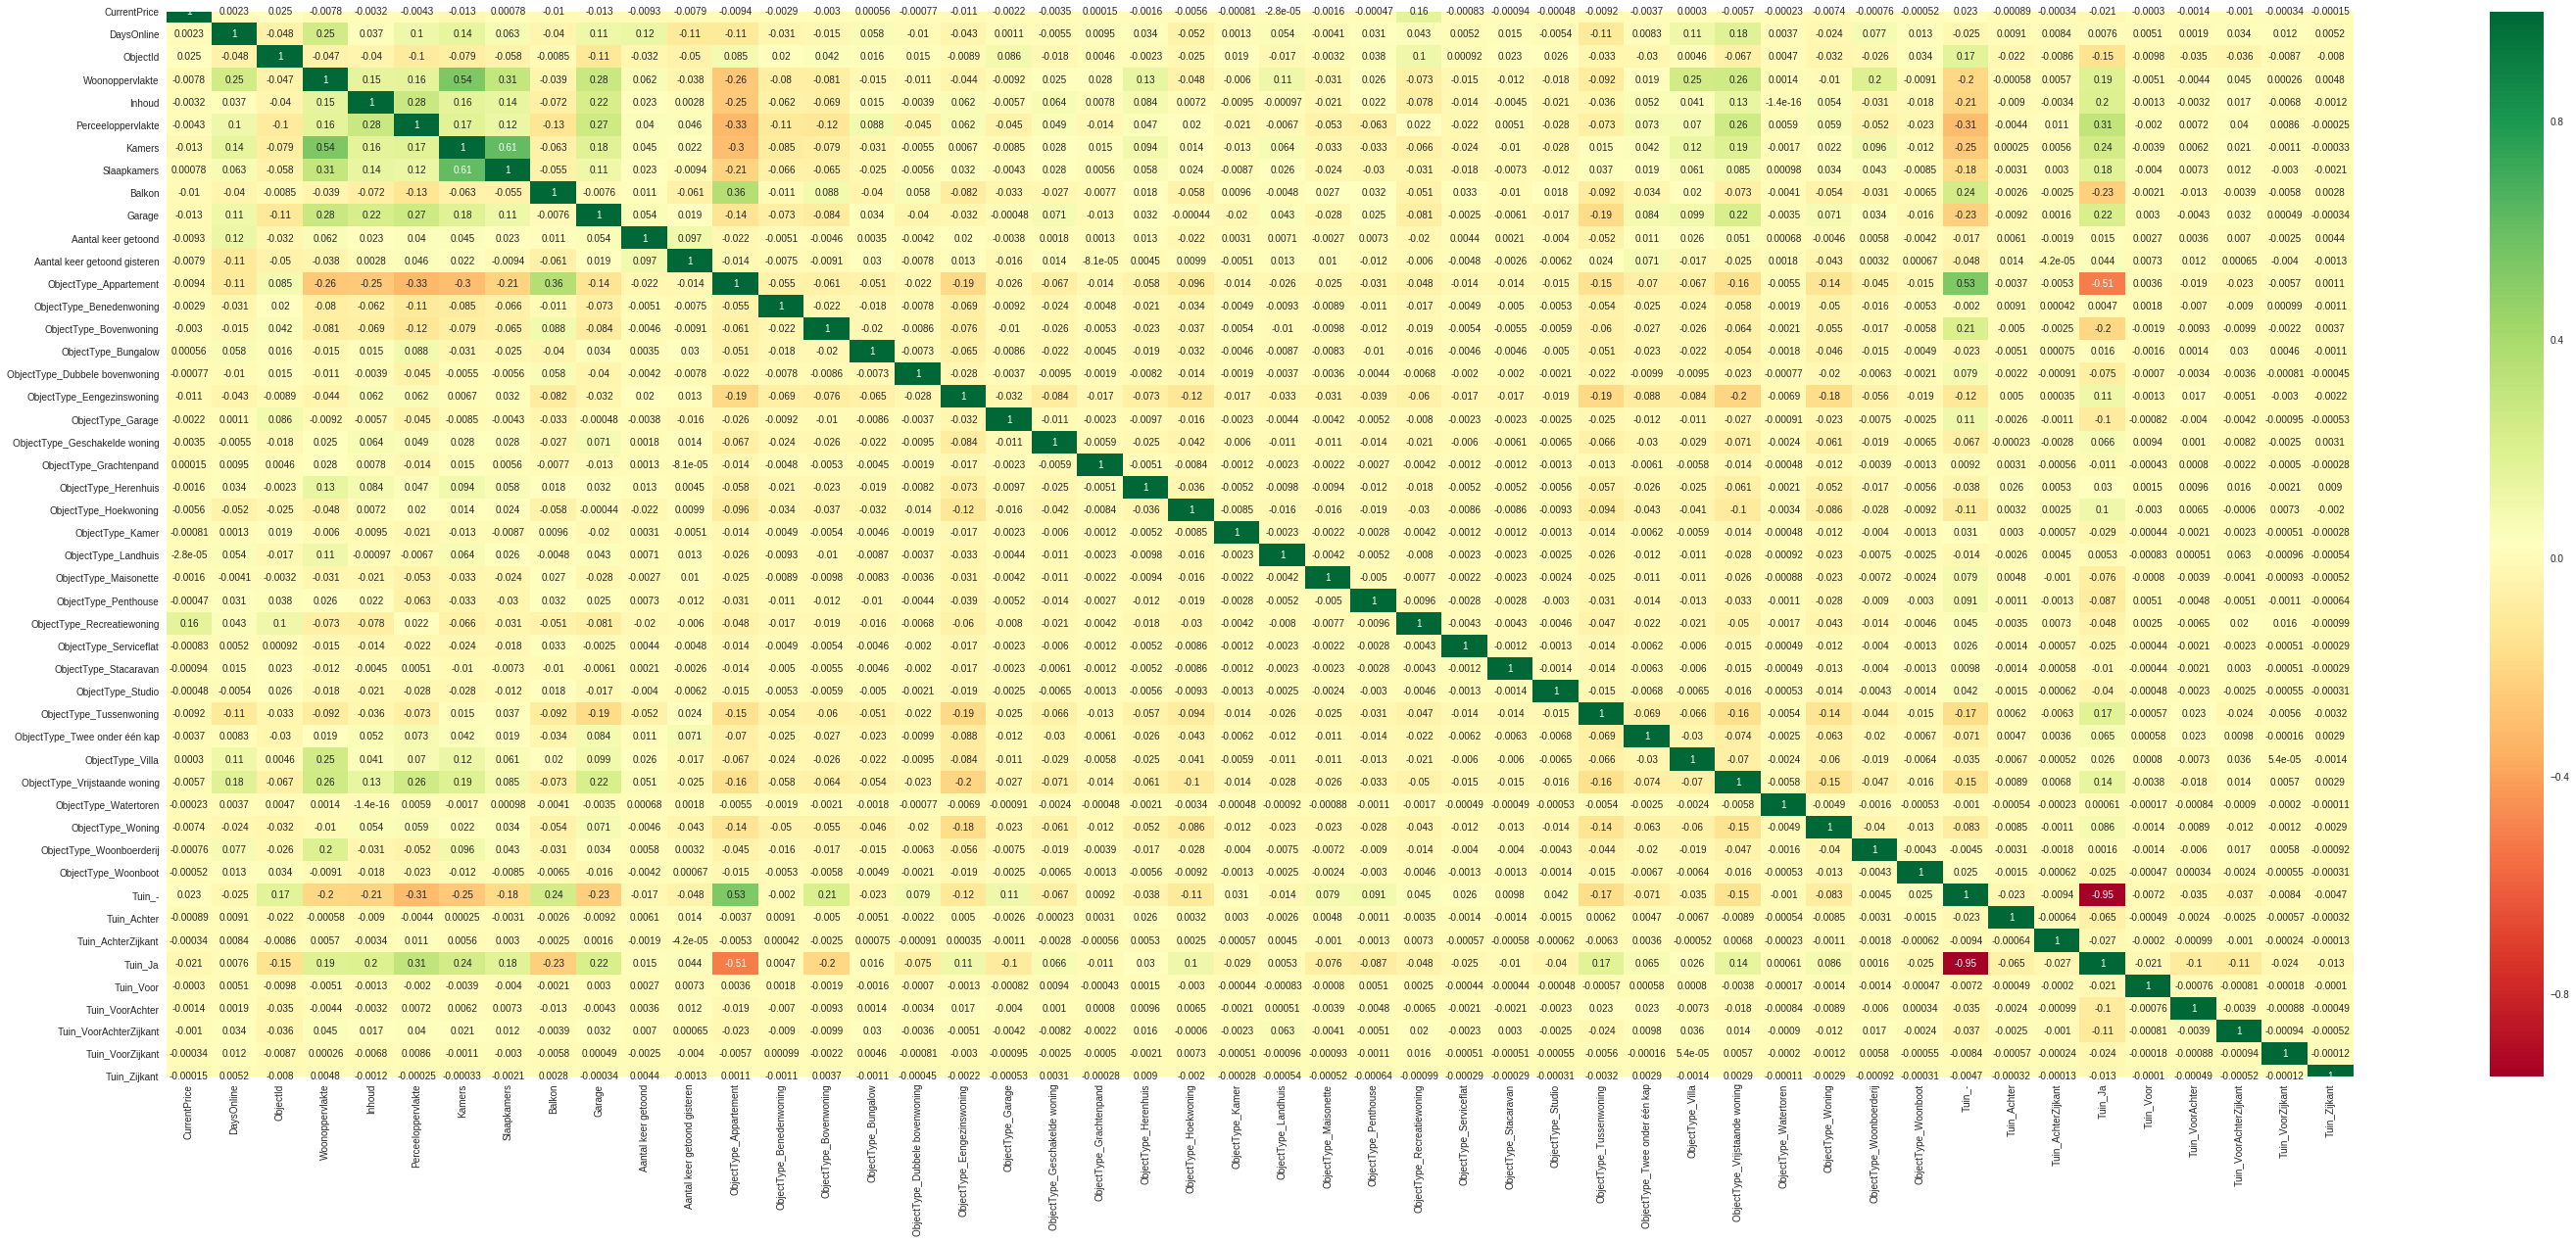

In [0]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
selected_data = df

In [0]:
# This data has been selected looking at the confrontation matrix, furthermore the variables have been selected in consultation with CBRE

selected_data = selected_data[['ObjectId', 'CurrentPrice', 'Woonoppervlakte', 'Inhoud', 'Perceeloppervlakte', 'Kamers', 'Slaapkamers', 'Balkon', 'Garage',                  
                               'DaysOnline', 'ObjectType_Appartement', 'ObjectType_Herenhuis', 'ObjectType_Tussenwoning', 'ObjectType_Villa', 'ObjectType_Vrijstaande woning',
                               'ObjectType_Woonboerderij', 'Tuin_-', 'Tuin_Ja', 'City']]

In [0]:
summary = selected_data.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
ObjectId,165992.0,1.004271e+07,3.713049e+06,1748024.000,7854597.0,9.425942e+06,12320698.75,1.579854e+07
CurrentPrice,165992.0,8.186270e+05,2.254400e+07,0.000,215000.0,2.950000e+05,429000.00,2.090000e+09
Woonoppervlakte,165992.0,1.331748e+02,6.747929e+01,0.000,95.0,1.200000e+02,150.00,9.940000e+02
Inhoud,165992.0,4.078485e+02,1.816864e+02,-29.241,315.0,4.078485e+02,485.00,9.990000e+02
Perceeloppervlakte,165992.0,1.825210e+02,2.132958e+02,0.000,0.0,1.380000e+02,266.00,9.990000e+02
Kamers,165992.0,4.900614e+00,2.061917e+00,0.000,4.0,5.000000e+00,5.00,2.320000e+02
Slaapkamers,165992.0,3.404604e+00,1.963973e+00,0.000,3.0,3.404604e+00,4.00,2.320000e+02
Balkon,165992.0,2.231136e-01,4.143628e-01,0.000,0.0,0.000000e+00,0.00,1.000000e+00
Garage,165992.0,3.838028e-01,4.840084e-01,0.000,0.0,0.000000e+00,1.00,1.000000e+00
DaysOnline,165992.0,8.775313e+01,7.145528e+01,1.000,34.0,6.300000e+01,125.00,2.530000e+02


In [0]:
selected_data.skew(axis = 0, skipna = True)

ObjectId                         -0.024722
CurrentPrice                     57.672476
Woonoppervlakte                   2.910349
Inhoud                            0.317434
Perceeloppervlakte                1.473852
Kamers                           24.219160
Slaapkamers                      68.079094
Balkon                            1.336461
Garage                            0.480151
DaysOnline                        0.997561
ObjectType_Appartement            2.149747
ObjectType_Herenhuis              6.608772
ObjectType_Tussenwoning           2.189448
ObjectType_Villa                  5.726760
ObjectType_Vrijstaande woning     1.994506
ObjectType_Woonboerderij          8.695341
Tuin_-                            1.154155
Tuin_Ja                          -1.038511
dtype: float64

In [0]:
df = selected_data

In [0]:
# skewness along the index axis 
df.skew(axis = 0, skipna = True)

ObjectId                         -0.024722
CurrentPrice                     57.672476
Woonoppervlakte                   2.910349
Inhoud                            0.317434
Perceeloppervlakte                1.473852
Kamers                           24.219160
Slaapkamers                      68.079094
Balkon                            1.336461
Garage                            0.480151
DaysOnline                        0.997561
ObjectType_Appartement            2.149747
ObjectType_Herenhuis              6.608772
ObjectType_Tussenwoning           2.189448
ObjectType_Villa                  5.726760
ObjectType_Vrijstaande woning     1.994506
ObjectType_Woonboerderij          8.695341
Tuin_-                            1.154155
Tuin_Ja                          -1.038511
dtype: float64

In [0]:
## To avoid Skewness based on domain knowledge

df = df[(df['Woonoppervlakte'] >= 30) & (df['Woonoppervlakte'] <= 250)]
df = df[(df['CurrentPrice'] >= 100000) & (df['CurrentPrice'] <= 1400000)]
df = df[(df['Slaapkamers'] >= 1) & (df['Slaapkamers'] <= 10)]
df = df[(df['Kamers'] >= 1) & (df['Kamers'] <=15)]
df = df[(df['Inhoud'] >= 75)]

In [0]:
summary = df.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
ObjectId,149575.0,9.981239e+06,3.668126e+06,1748024.0,7830394.5,9.358759e+06,11856784.0,15798536.0
CurrentPrice,149575.0,3.340799e+05,1.785844e+05,100000.0,215000.0,2.890000e+05,399000.0,1400000.0
Woonoppervlakte,149575.0,1.217027e+02,3.981881e+01,30.0,94.0,1.180000e+02,143.0,250.0
Inhoud,149575.0,4.279272e+02,1.535199e+02,75.0,335.0,4.078485e+02,495.0,999.0
Perceeloppervlakte,149575.0,1.830274e+02,2.053486e+02,0.0,0.0,1.430000e+02,265.0,999.0
Kamers,149575.0,4.714418e+00,1.384634e+00,1.0,4.0,5.000000e+00,5.0,15.0
Slaapkamers,149575.0,3.323037e+00,1.005195e+00,1.0,3.0,3.404604e+00,4.0,10.0
Balkon,149575.0,2.255026e-01,4.158364e-01,0.0,0.0,0.000000e+00,0.0,1.0
Garage,149575.0,3.718923e-01,4.808598e-01,0.0,0.0,0.000000e+00,1.0,1.0
DaysOnline,149575.0,8.297867e+01,6.815069e+01,1.0,33.0,5.900000e+01,114.0,253.0


In [0]:
# skewness along the index axis after dropping some values 
df.skew(axis = 0, skipna = True)

ObjectId                          0.013759
CurrentPrice                      1.879988
Woonoppervlakte                   0.607836
Inhoud                            0.896393
Perceeloppervlakte                1.457521
Kamers                            0.642199
Slaapkamers                       0.138165
Balkon                            1.320293
Garage                            0.532582
DaysOnline                        1.111023
ObjectType_Appartement            2.040471
ObjectType_Herenhuis              6.969976
ObjectType_Tussenwoning           2.056551
ObjectType_Villa                  7.067420
ObjectType_Vrijstaande woning     2.238456
ObjectType_Woonboerderij         11.925948
Tuin_-                            1.163455
Tuin_Ja                          -1.046075
dtype: float64

(array([ 3339.,  6934., 10364., 13139., 13302., 13149., 12355., 11212.,
         8830.,  8998.,  6757.,  6447.,  4276.,  4343.,  3623.,  3251.,
         2236.,  2366.,  1845.,  2041.,  1203.,  1266.,  1387.,   714.,
          814.,   739.,   926.,   213.,   529.,   300.,   551.,   157.,
          250.,   148.,   388.,    20.,    86.,    62.,   161.,    21.,
          114.,    60.,   152.,    24.,   130.,   111.,    45.,    25.,
           75.,    97.]),
 array([ 100000.,  126000.,  152000.,  178000.,  204000.,  230000.,
         256000.,  282000.,  308000.,  334000.,  360000.,  386000.,
         412000.,  438000.,  464000.,  490000.,  516000.,  542000.,
         568000.,  594000.,  620000.,  646000.,  672000.,  698000.,
         724000.,  750000.,  776000.,  802000.,  828000.,  854000.,
         880000.,  906000.,  932000.,  958000.,  984000., 1010000.,
        1036000., 1062000., 1088000., 1114000., 1140000., 1166000.,
        1192000., 1218000., 1244000., 1270000., 1296000., 1322000.

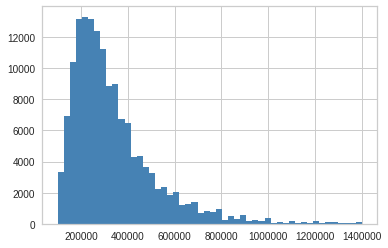

In [0]:
pyplot.hist(df.CurrentPrice, bins=50, color='steelblue')


(array([6.100e+01, 1.000e+00, 1.000e+00, 5.000e+00, 1.800e+01, 4.000e+00,
        2.100e+01, 3.900e+01, 2.900e+01, 1.700e+01, 5.100e+01, 7.000e+01,
        1.470e+02, 1.350e+02, 2.310e+02, 1.530e+02, 5.000e+02, 3.290e+02,
        6.970e+02, 4.730e+02, 1.165e+03, 6.600e+02, 1.425e+03, 7.480e+02,
        1.867e+03, 9.220e+02, 2.121e+03, 1.312e+03, 3.138e+03, 1.493e+03,
        3.303e+03, 1.679e+03, 3.958e+03, 2.003e+03, 3.711e+03, 1.948e+03,
        4.534e+03, 2.125e+03, 4.020e+03, 1.988e+03, 5.631e+03, 2.549e+03,
        4.776e+03, 2.735e+03, 6.004e+03, 2.727e+03, 5.369e+03, 2.748e+03,
        6.070e+03, 2.618e+03, 3.894e+03, 3.589e+03, 3.424e+03, 8.618e+03,
        2.759e+03, 2.749e+03, 2.676e+03, 2.803e+03, 2.008e+03, 2.393e+03,
        2.333e+03, 1.999e+03, 1.547e+03, 1.842e+03, 1.758e+03, 1.479e+03,
        1.290e+03, 1.322e+03, 1.331e+03, 1.135e+03, 1.081e+03, 9.830e+02,
        1.163e+03, 9.010e+02, 7.940e+02, 8.830e+02, 8.190e+02, 6.790e+02,
        6.080e+02, 6.130e+02, 9.980e+0

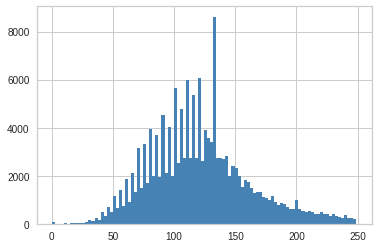

In [0]:
pyplot.hist(df.Woonoppervlakte, bins=100, color='steelblue')


(array([1.6000e+01, 1.2000e+01, 1.7680e+03, 4.2200e+02, 9.0000e+00,
        1.2000e+01, 7.0000e+00, 2.1000e+01, 2.6000e+01, 4.2000e+01,
        9.0000e+01, 1.4200e+02, 2.3500e+02, 2.7900e+02, 3.6300e+02,
        6.2200e+02, 5.2500e+02, 8.0400e+02, 8.6000e+02, 1.0500e+03,
        1.2940e+03, 1.1650e+03, 1.7940e+03, 1.7790e+03, 1.9520e+03,
        1.8260e+03, 1.8960e+03, 2.3650e+03, 1.9790e+03, 2.5560e+03,
        2.3230e+03, 2.1110e+03, 4.1810e+03, 2.8090e+03, 3.4720e+03,
        3.0120e+03, 4.2500e+03, 3.3350e+03, 3.2230e+03, 4.2030e+03,
        3.3810e+03, 4.3370e+03, 3.0294e+04, 3.3290e+03, 3.3270e+03,
        2.7440e+03, 3.4320e+03, 2.3680e+03, 2.2080e+03, 2.5500e+03,
        2.3050e+03, 2.9180e+03, 1.7260e+03, 1.9360e+03, 1.8190e+03,
        1.5150e+03, 1.8120e+03, 1.5560e+03, 1.4100e+03, 1.4260e+03,
        1.1380e+03, 1.6480e+03, 1.0390e+03, 9.9400e+02, 1.0740e+03,
        8.3100e+02, 1.1090e+03, 8.5000e+02, 1.0230e+03, 7.1600e+02,
        9.6300e+02, 5.6600e+02, 6.1500e+02, 6.14

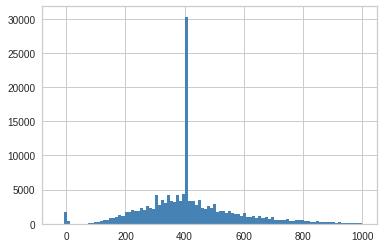

In [0]:
pyplot.hist(df.Inhoud, bins=100, color='steelblue')


(array([52397.,   640.,   225.,   116.,   201.,   389.,   548.,   779.,
         1008.,  1445.,  2051.,  3046.,  4488.,  5625.,  5571.,  5168.,
         4238.,  3176.,  2975.,  2441.,  2463.,  2443.,  2479.,  2339.,
         2484.,  2301.,  2089.,  1998.,  1829.,  1672.,  1654.,  1357.,
         1237.,  1161.,  1016.,  1028.,   908.,   878.,   846.,   841.,
          902.,   739.,   697.,   727.,   659.,   641.,   585.,   581.,
          589.,   526.,   620.,   492.,   510.,   504.,   483.,   472.,
          441.,   469.,   388.,   410.,   454.,   364.,   358.,   374.,
          333.,   299.,   305.,   285.,   302.,   263.,   251.,   241.,
          245.,   285.,   222.,   264.,   214.,   193.,   185.,   189.,
          223.,   196.,   171.,   166.,   156.,   168.,   162.,   159.,
          143.,   136.,   164.,   119.,   127.,   154.,   114.,   136.,
          111.,   133.,   122.,   104.]),
 array([  0.  ,   9.99,  19.98,  29.97,  39.96,  49.95,  59.94,  69.93,
         79.92,  89.91

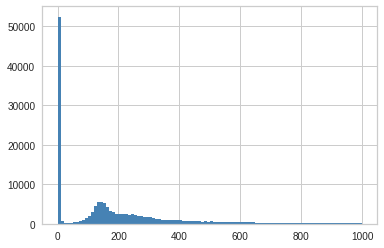

In [0]:
pyplot.hist(df.Perceeloppervlakte, bins=100, color='steelblue')


In [0]:
Perceeloppervlakte = df.groupby('Perceeloppervlakte').size()
Perceeloppervlakte.columns = ['Perceeloppervlakte', 'aantal']

Perceeloppervlakte.to_csv("/content/drive/My Drive/Master Data Science & Society/Year 2/Thesis/Data/Perceeloppervlakte.csv", encoding = "ISO-8859-1")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


In [0]:
df_perceeloppervlakte = pd.DataFrame(Perceeloppervlakte)
df_perceeloppervlakte


,0
Perceeloppervlakte,
0.000,8
1.000,233
1.001,7
1.002,10
1.003,13
...,...
995.000,27
996.000,3
997.000,7


(array([7.6400e+02, 5.4480e+03, 2.0727e+04, 3.3464e+04, 5.6805e+04,
        2.0043e+04, 7.4950e+03, 2.9880e+03, 1.0620e+03, 4.3100e+02,
        1.8600e+02, 8.3000e+01, 4.9000e+01, 1.9000e+01, 1.1000e+01]),
 array([ 1.        ,  1.93333333,  2.86666667,  3.8       ,  4.73333333,
         5.66666667,  6.6       ,  7.53333333,  8.46666667,  9.4       ,
        10.33333333, 11.26666667, 12.2       , 13.13333333, 14.06666667,
        15.        ]),
 <a list of 15 Patch objects>)

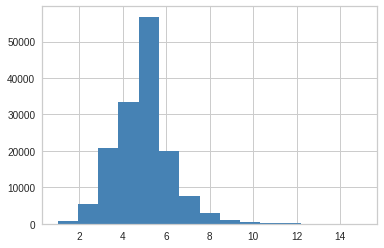

In [0]:
pyplot.hist(df.Kamers, bins=15, color='steelblue')


(array([3.0600e+02, 6.4650e+03, 2.3282e+04, 7.1770e+04, 3.9183e+04,
        1.2280e+04, 2.3810e+03, 4.5900e+02, 9.7000e+01, 3.6000e+01]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

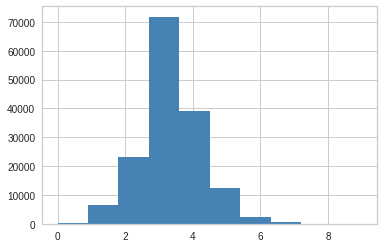

In [0]:
pyplot.hist(df.Slaapkamers, bins=10, color='steelblue')


(array([ 8540.,  8514., 11618., 12011., 13636., 14618.,  8377.,  7990.,
         7295.,  6618.,  6297.,  4578.,  4050.,  3515.,  2847.,  3279.,
         2452.,  2452.,  2229.,  1824.,  1785.,  1812.,  1654.,  4683.,
          851.,   943.,   809.,   795.,   700.,  9487.]),
 array([  1. ,   9.4,  17.8,  26.2,  34.6,  43. ,  51.4,  59.8,  68.2,
         76.6,  85. ,  93.4, 101.8, 110.2, 118.6, 127. , 135.4, 143.8,
        152.2, 160.6, 169. , 177.4, 185.8, 194.2, 202.6, 211. , 219.4,
        227.8, 236.2, 244.6, 253. ]),
 <a list of 30 Patch objects>)

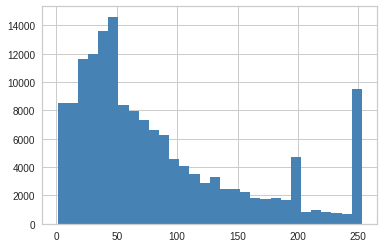

In [0]:
pyplot.hist(df.DaysOnline, bins=30, color='steelblue')


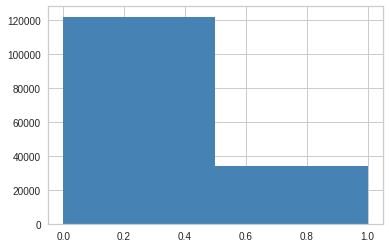

In [0]:
from matplotlib.ticker import PercentFormatter


pyplot.hist(df.Balkon, bins=2, color='steelblue')

plt.show()

(array([99083., 57176.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

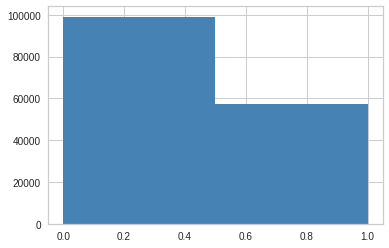

In [0]:
pyplot.hist(df.Garage, bins=2, color='steelblue')


(array([134230.,  22029.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

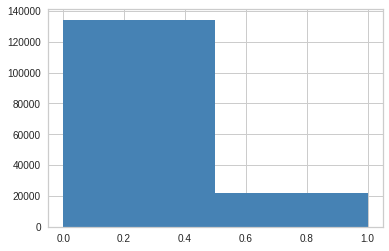

In [0]:
pyplot.hist(df.ObjectType_Appartement, bins=2, color='steelblue')


(array([153295.,   2964.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

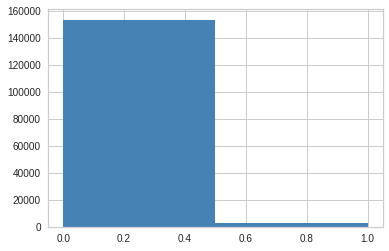

In [0]:
pyplot.hist(df.ObjectType_Herenhuis, bins=2, color='steelblue')


(array([134797.,  21462.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

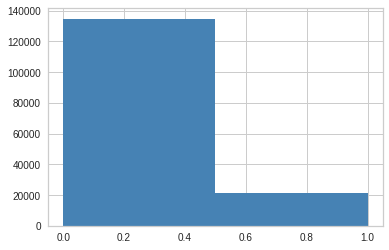

In [0]:
pyplot.hist(df.ObjectType_Tussenwoning, bins=2, color='steelblue')


In [0]:
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str)) else x)
df.columns = cols

(array([153229.,   3030.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

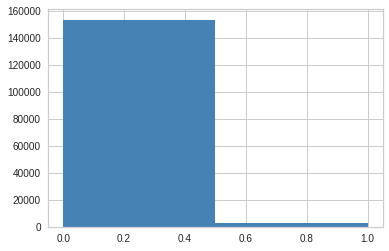

In [0]:
pyplot.hist(df.ObjectType_Villa,bins=2, color='steelblue')

(array([135602.,  20657.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

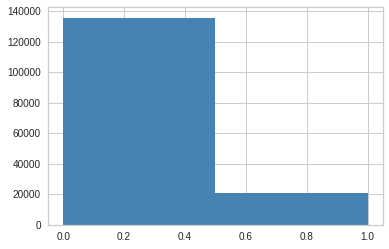

In [0]:
pyplot.hist(df.ObjectType_Vrijstaande_woning,bins=2, color='steelblue')

In [0]:
df

,ObjectId,CurrentPrice,Woonoppervlakte,Inhoud,Perceeloppervlakte,Kamers,Slaapkamers,Balkon,Garage,DaysOnline,ObjectType_Appartement,ObjectType_Herenhuis,ObjectType_Tussenwoning,ObjectType_Villa,ObjectType_Vrijstaande_woning,ObjectType_Woonboerderij,Tuin_-,Tuin_Ja,City
10,15730722,309500.0,82.000000,359.000000,256.356913,3.0,2.000000,0.0,1.0,206.0,0,0,0,0,0,0,0,1,Almere
14,15680166,338200.0,93.000000,290.000000,256.356913,3.0,2.000000,0.0,1.0,249.0,1,0,0,0,0,0,1,0,Almere
92,15703843,395000.0,185.000000,595.000000,256.356913,4.0,3.000000,0.0,1.0,252.0,0,0,0,0,0,0,1,0,Ulvenhout
111,15725213,282900.0,140.000000,480.000000,256.356913,7.0,3.000000,0.0,1.0,37.0,0,0,0,0,0,0,0,1,Horn
147,15774203,306500.0,133.174763,528.000000,363.000000,5.0,4.000000,0.0,1.0,87.0,0,0,0,0,0,0,1,0,Diever
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176868,11272531,83500.0,80.000000,250.000000,515.000000,4.0,3.404604,0.0,0.0,2.0,0,0,0,0,0,0,0,1,Hoogersmilde
176869,11272534,85000.0,80.000000,250.000000,490.000000,4.0,3.404604,0.0,0.0,2.0,0,0,0,0,0,0,0,1,Hoogersmilde
176871,15704337,295000.0,110.000000,407.848527,350.000000,5.0,4.000000,0.0,1.0,2.0,0,0,0,0,0,0,0,1,Paterswolde
176872,15685897,227000.0,110.000000,360.000000,157.000000,4.0,3.000000,0.0,0.0,2.0,0,0,0,0,0,0,0,1,Zuidhorn


(array([155030.,   1229.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

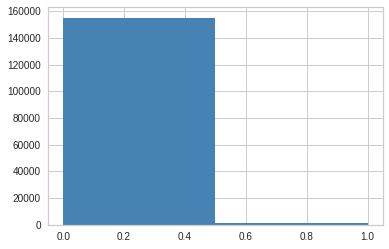

In [0]:
pyplot.hist(df.ObjectType_Woonboerderij, bins=2, color='steelblue')


In [0]:
cols = df.columns
cols = cols.map(lambda x: x.replace('-', 'Nee') if isinstance(x, (str)) else x)
df.columns = cols

(array([116242.,  40017.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

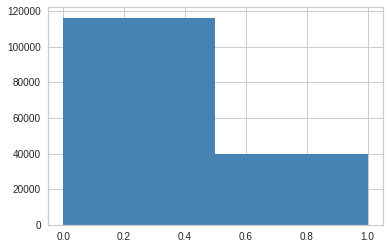

In [0]:
pyplot.hist(df.Tuin_Nee, bins=2, color='steelblue')


(array([ 43047., 113212.]),
 array([0. , 0.5, 1. ]),
 <a list of 2 Patch objects>)

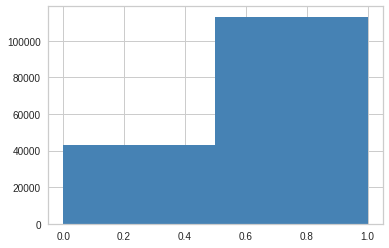

In [0]:
pyplot.hist(df.Tuin_Ja, bins=2, color='steelblue')

In [0]:
df

,ObjectId,CurrentPrice,Woonoppervlakte,Inhoud,Perceeloppervlakte,Kamers,Slaapkamers,Balkon,Garage,DaysOnline,ObjectType_Appartement,ObjectType_Herenhuis,ObjectType_Tussenwoning,ObjectType_Villa,ObjectType_Vrijstaande woning,ObjectType_Woonboerderij,Tuin_-,Tuin_Ja,City
10,15730722,309500.0,82.000000,359.000000,0.000,3.0,2.0,0.0,1.0,206.0,0,0,0,0,0,0,0,1,Almere
14,15680166,338200.0,93.000000,290.000000,0.000,3.0,2.0,0.0,1.0,249.0,1,0,0,0,0,0,1,0,Almere
92,15703843,395000.0,185.000000,595.000000,0.000,4.0,3.0,0.0,1.0,252.0,0,0,0,0,0,0,1,0,Ulvenhout
111,15725213,282900.0,140.000000,480.000000,0.000,7.0,3.0,0.0,1.0,37.0,0,0,0,0,0,0,0,1,Horn
147,15774203,306500.0,133.174763,528.000000,363.000,5.0,4.0,0.0,1.0,87.0,0,0,0,0,0,0,1,0,Diever
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176864,15690792,269000.0,166.000000,407.848527,245.000,6.0,5.0,0.0,0.0,2.0,0,0,0,0,0,0,0,1,Marum
176865,8546156,349000.0,123.000000,385.000000,1.530,4.0,3.0,0.0,1.0,2.0,0,0,0,0,1,0,0,1,Hoogersmilde
176871,15704337,295000.0,110.000000,407.848527,350.000,5.0,4.0,0.0,1.0,2.0,0,0,0,0,0,0,0,1,Paterswolde
176872,15685897,227000.0,110.000000,360.000000,157.000,4.0,3.0,0.0,0.0,2.0,0,0,0,0,0,0,0,1,Zuidhorn


In [0]:
df.to_csv("/content/drive/My Drive/Master Data Science & Society/Year 2/Thesis/Data/part1_selectedfeatures/selected_features.csv", encoding = "ISO-8859-1")